<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#선형-회귀를-사용한-머신러닝-연습" data-toc-modified-id="선형-회귀를-사용한-머신러닝-연습-1">선형 회귀를 사용한 머신러닝 연습</a></span></li></ul></div>

## 선형 회귀를 사용한 머신러닝 연습

사이킷런은 아나콘다 배포판에 기본으로 포함되어 있습니다. 여기에서 사용할 데이터셋은 사이킷런에 포함되어 있는 예제 데이터셋으로 당뇨병 데이터셋입니다. 당뇨병 데이터셋을 로드하기 위해 먼저 `datasets` 모듈을 임포트합니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
from sklearn import datasets
```

In [3]:
from sklearn import datasets

`load_diabetes()` 함수는 `Bunch` 클래스의 객체를 반환합니다. 이 객체는 파이썬의 딕셔너리와 유사하고 사이킷런에서 예제 데이터셋을 위해 만든 것입니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
diabetes = datasets.load_diabetes()
```

In [4]:
diabetes = datasets.load_diabetes()

`diabetes`는 일반 딕셔너리처럼 `keys()` 메서드에서 객체가 가지고 있는 키 값을 모두 반환해줍니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
diabetes.keys()
```

In [5]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

`data` 키에 훈련 데이터가 있고, `target` 키에 타깃 레이블이 있습니다. 나머지 두 개의 컬럼은 데이터셋에 대한 설명과, 컬럼의 이름을 가지고 있습니다. `data`와 `target`의 데이터 타입이 무엇인지 확인해 보겠습니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
type(diabetes.data)
```

In [6]:
type(diabetes.data)

numpy.ndarray

```python
# 다음 셀에 코드를 직접 입력해 보세요
type(diabetes.target)
```

In [7]:
type(diabetes.target)

numpy.ndarray

데이터가 넘파이 배열로 되어 있으므로 배열의 차원을 확인해 보겠습니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
diabetes.data.shape
```

In [8]:
diabetes.data.shape

(442, 10)

```python
# 다음 셀에 코드를 직접 입력해 보세요
diabetes.target.shape
```

In [9]:
diabetes.target.shape

(442,)

데이터에 어떤 값이 들어 있는지 잠깐 확인해 보겠습니다. 전체 데이터는 양이 많으므로 처음 두 개의 샘플만 출력합니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
diabetes.data[:2]
```

In [10]:
diabetes.data[:2]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405]])

```python
# 다음 셀에 코드를 직접 입력해 보세요
diabetes.target[:2]
```

In [11]:
diabetes.target[:2]

array([151.,  75.])

문제를 간단하게 시각화하기 위해서 하나의 특성만을 사용해 보겠습니다. 세 번째 특성을 출력하면 타깃과 상관관계가 있음을 확인할 수 있습니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
import matplotlib.pyplot as plt
```

In [12]:
import matplotlib.pyplot as plt

```python
# 다음 셀에 코드를 직접 입력해 보세요
plt.scatter(diabetes.data[:, 2], diabetes.target)
```

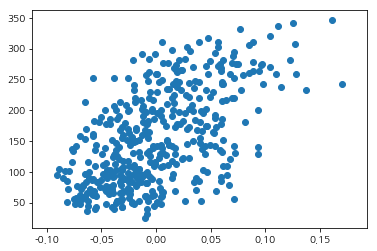

In [13]:
plt.scatter(diabetes.data[:, 2], diabetes.target)

그럼 이제 확률적 경사 하강법을 사용하는 사이킷런의 `SGDRegressor` 모델을 임포트합니다. 이 모델은 회귀를 위한 모델입니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
from sklearn.linear_model import SGDRegressor
```

In [14]:
from sklearn.linear_model import SGDRegressor

`SGDRegressor` 클래스의 객체를 만들겠습니다. 객체를 만들 때 여러 매개변수를 전달할 수 있지만 지금은 기본 값을 사용하겠습니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
sgd_regr = SGDRegressor()
```

In [26]:
sgd_regr = SGDRegressor()

사이킷런의 모델 객체를 출력하면 친절하게 현재 객체에 설정된 매개변수 값을 함께 보여줍니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
sgd_regr
```

In [16]:
sgd_regr

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

이제 당뇨병 데이터의 세 번째 특성을 사용해 모델을 학습시킬 차례입니다. 두 번째 특성을 선택해서 별도의 변수 `x`에 저장합니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
x = diabetes.data[:, 2]
x.shape
```

In [17]:
x = diabetes.data[:, 2]
x.shape

(442,)

변수 `x`의 크기를 확인해 보면 1차원 배열임을 알 수 있습니다. 사이킷런은 입력 데이터가 항상 2차원 배열일 것으로 간주하고 있습니다. 1차원 배열을 넣으면 에러가 발생합니다. 넘파이에서 배열의 크기를 변경하는 함수는 `reshape()` 메서드입니다.

특히 `-1`로 지정된 차원은 다른 차원이 모두 채워진 후 남은 차원을 의미합니다. `(-1, 1)`로 차원을 지정하게 되면 전체 원소의 개수는 그대로 유지하고 2차원 배열을 간단하게 만들 수 있습니다. 사이킷런은 관례적으로 행렬(2차원배열)에는 대문자 변수를 사용합니다. 여기에서도 대문자 `X`를 사용하겠습니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
X = x.reshape(-1, 1)
X.shape
```

In [18]:
X = x.reshape(-1, 1)
X.shape

(442, 1)

그럼 간단히 변환된 데이터가 어떻게 차이나는지 확인해 보죠. 2개의 행만 출력해 보겠습니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
x[:2]
```

In [20]:
X[:2]

array([[ 0.06169621],
       [-0.05147406]])

이제 위에서 만든 `sgd_regr` 모델을 학습시킬 차례입니다. 사이킷런에서 학습하는 메서드는 모두 `fit()`입니다. 

```python
# 다음 셀에 코드를 직접 입력해 보세요
sgd_regr.fit(X, diabetes.target)
```

In [27]:
sgd_regr.fit(X, diabetes.target)

/Users/alex/Documents/Python/WhirlwindTourOfPython/_venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

확률적 경사 하강법은 점진적으로 모델 파라미터를 변경하기 때문에 반복적으로 학습이 진행됩니다. 이 경고는 반복 횟수를 지정하는 `max_iter`의 기본값이 5로 지정되었다는 것을 알려줍니다. 이는 확실히 충분하지 않은 값이므로 반복 횟수를 늘려서 실행해 보겠습니다. 반복 횟수를 늘리려면 `sgd_regr` 객체를 다시 생성해 주어야 합니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
sgd_regr = SGDRegressor(max_iter=20000)
sgd_regr.fit(X, diabetes.target)
```

In [29]:
sgd_regr = SGDRegressor(max_iter=20000, tol=1e-3)
sgd_regr.fit(X, diabetes.target)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=20000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

사이킷런의 선형 모델은 찾은 모델 파라미터를 각각 `coef_`와 `intercept_` 속성에 저장하고 있습니다. 즉 

$$ y = coef\_ * x + intercept\_ $$

의 모델 파라미터를 찾은 것입니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
sgd_regr.coef_, sgd_regr.intercept_
```

In [30]:
sgd_regr.coef_, sgd_regr.intercept_

(array([804.21146471]), array([152.16116669]))

찾은 직선을 화면에 출력해 보겠습니다. `matplotlib`은 여러 개의 그래프를 중복해서 그릴 수 있으며 한 셀의 실행이 끝나면 자동으로 `plt.show()` 함수를 호출해 줍니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
plt.scatter(x, diabetes.target)
plt.plot(x, x * sgd_regr.coef_ + sgd_regr.intercept_)
```

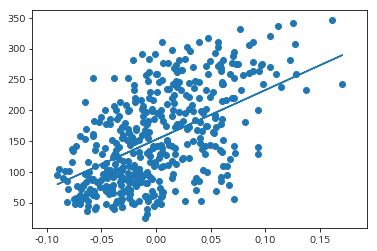

In [39]:
plt.scatter(x, diabetes.target)
plt.plot(x, x * sgd_regr.coef_ + sgd_regr.intercept_)

확률적 경사 하강법은 신경망 알고리즘에서 사용하는 대표적인 방법입니다. 그리고 데이터셋이 클 경우 선택할 수 있는 좋을 최적화 알고리즘입니다. 

오래전부터 선형 회귀에는 행렬 분해 방식을 사용하여 정규 방정식의 해를 계산하는 방식이 사용되었습니다. 사이킷런에도 `LinearRegression` 클래스에서 이를 지원합니다.

$$w = (X^TX)^{-1}X^Ty$$

역시 동일하게 `linear_model` 패키지에서 `LinearRegression` 클래스를 임포트하겠습니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
from sklearn.linear_model import LinearRegression
```

In [33]:
from sklearn.linear_model import LinearRegression

`LinearRegression` 클래스의 객체를 생성합니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
lin_regr = LinearRegression()
```

In [34]:
lin_regr = LinearRegression()

앞에서 만든 데이터를 사용해 `fit()` 메서드를 호출하면 학습이 됩니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
lin_regr.fit(X, diabetes.target)
```

In [35]:
lin_regr.fit(X, diabetes.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

찾은 기울기와 절편을 출력하고 `sgd_regr`의 속성과 비교해 보겠습니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
lin_regr.coef_, lin_regr.intercept_, sgd_regr.coef_, sgd_regr.intercept_
```

In [36]:
lin_regr.coef_, lin_regr.intercept_, sgd_regr.coef_, sgd_regr.intercept_

(array([949.43526038]),
 152.1334841628967,
 array([804.21146471]),
 array([152.16116669]))

앞에서와 동일하게 그래프로 나타내 보겠습니다.

```python
# 다음 셀에 코드를 직접 입력해 보세요
plt.scatter(x, diabetes.target)
plt.plot(x, x * lin_regr.coef_ + lin_regr.intercept_)
plt.plot(x, x * sgd_regr.coef_ + sgd_regr.intercept_)
```

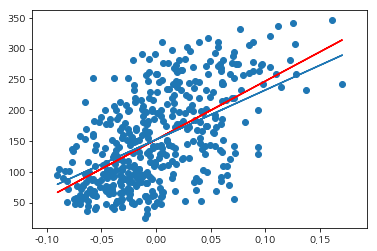

In [40]:
plt.scatter(x, diabetes.target)
plt.plot(x, x * lin_regr.coef_ + lin_regr.intercept_, "r")
plt.plot(x, x * sgd_regr.coef_ + sgd_regr.intercept_)